In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [9]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)

base_color = sb.color_palette()[0]

df_group_pastDue = df.copy()
df_group_pastDue.loc[df_group_pastDue['LoanStatus'].str[:4] == 'Past', 'LoanStatus'] = 'Past Due'


df_APR_small = df[df['BorrowerAPR'] <= df['BorrowerAPR'].mean()]
df_APR_big = df[df['BorrowerAPR'] > df['BorrowerAPR'].mean()]

## Dataset Overview

Data name: Loan Data from Prosper.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

# Explanatory Data

In these dataset, we would like to explore the main variable of interest: LoanStatus, BorrowerAPR and BorrowerRate.
With the relationship with other important varibale: BorrowerState, EmploymentStatus, Investors.

>Main findings:
> - **LoanStatus**:
>The most loan status are **completed** and **current**.
> - **BorrowerState**:
>The most loan borrower state is **CA**.
> - **EmploymentStatus**:
>The most employment status is **employed**, then is **full-time**.
>- **LoanStatus vs BorrowerState**:
>The state have more loan are **CA**, **FL**, **IL**, **NY** and **TX**.
All of them have more current loan, then completed loan.
>- **LoanStatus vs EmploymentStatus**:
>The largest amount of loan are belongs to **current+employed**. Then is **full-time+completed**, **completed+employed**.
>- **LoanStatus vs EmploymentStatus vs BorrowerAPR**
>Employed people are having a higher borrowerAPR than others in defaulted load status.





>Main findings:
>- **LoanStatus vs BorrowerAPR**: 
>We have **completed** loan status has lowest borrowerAPR. **PastDue** has the highest borrowerAPR.
> - **BorrowerAPR vs BorrowerState**: 
The higher Borrower APR are from **AR** and **AL** and **MS**.
The lower Borrower APR are from **ME** and **IA**.
> - **BorrowerAPR vs EmploymentStatus**:
The higher Borrower APR are from **not employed**.
The lower Borrower APR are from **part-time**.
> - **LoanStatus vs BorrowerState vs BorrowerAPR**:
>AR has a higher borrower in defaulted load status.
>AR and AL have a higher borrower AR in past due load status.
>ME and IA in all load status are having a load borrower APR.

## Univariate Exploration
### LoanStatus
The most loan status are **completed** and **current**. We have 49.7% of current load status and 33.4% of completed status.

(-1.1080125317969272,
 1.135841647615483,
 -1.1050259356671368,
 1.1388282437452732)

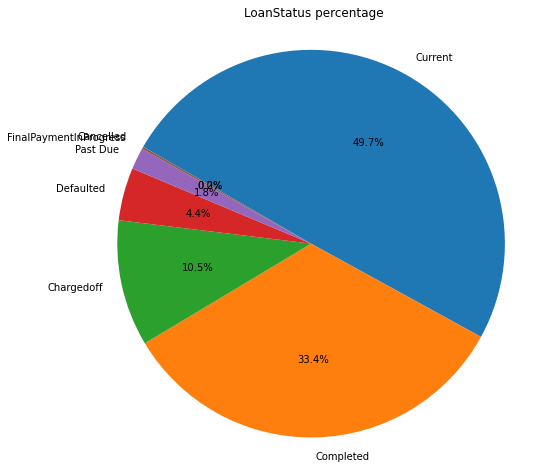

In [10]:
plt.figure(figsize = [8,8])
sorted_counts = df_group_pastDue['LoanStatus'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%',startangle = 150, counterclock = False);
plt.title('LoanStatus percentage')
plt.axis('square')

### BorrowerState
The most loan borrower state is **CA**, about 1/8 of the total amount. 

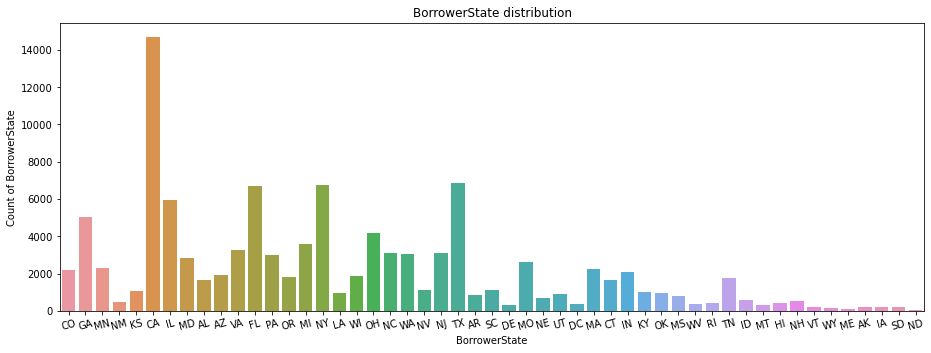

In [14]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='BorrowerState').set_title("BorrowerState distribution");
ax.set_xlabel('BorrowerState')
ax.set_ylabel('Count of BorrowerState')
plt.xticks(rotation=15);

### EmploymentStatus

The most employment status is **employed**, then is **full-time**. More than 50% are employed, about 45% are full-time.

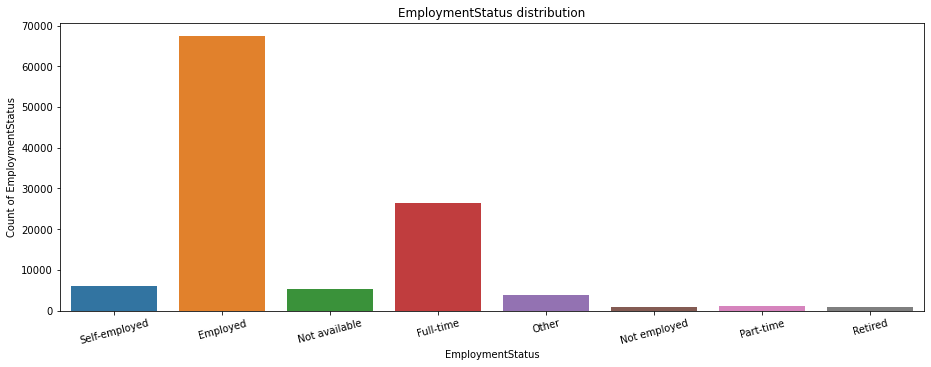

In [17]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='EmploymentStatus').set_title("EmploymentStatus distribution");
ax.set_xlabel('EmploymentStatus')
ax.set_ylabel('Count of EmploymentStatus')
plt.xticks(rotation=15);

## Bivariate Exploration
### LoanStatus vs BorrowerState

The state have more loan are **CA**, **FL**, **IL**, **NY** and **TX**.
All of them have more current loan, then completed loan.
Completed CA loan amount is larger than other current loan in other state.

Text(0.5, 1.0, 'LoanStatus vs BorrowerState')

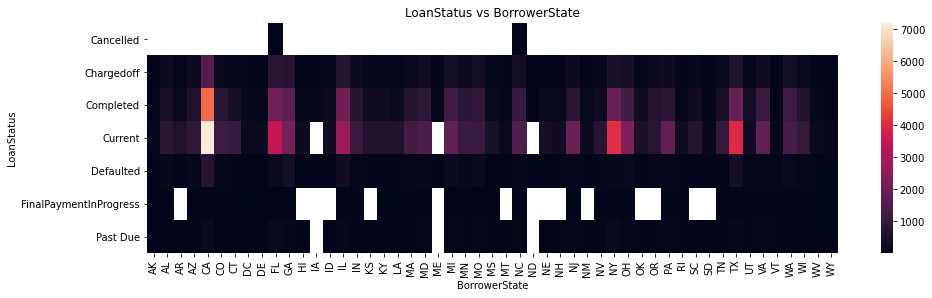

In [16]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 0.8])
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'BorrowerState', values = 'count')

sb.heatmap(ct_counts).set_title("LoanStatus vs BorrowerState")




### LoanStatus vs EmploymentStatus

The largest amount of loan are belongs to **current+employed**.
Then is **full-time+completed**, **completed+employed**.

Text(0.5, 1.0, 'LoanStatus vs EmploymentStatus')

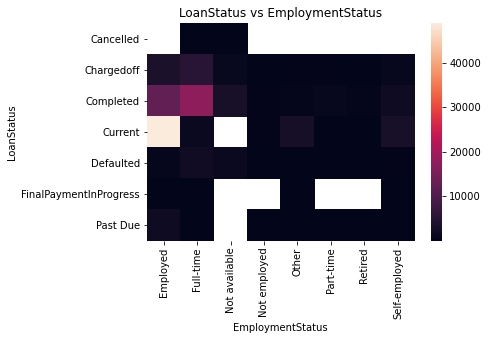

In [15]:
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

sb.heatmap(ct_counts).set_title('LoanStatus vs EmploymentStatus')

### BorrowerAPR

The mean of borrowerAPR be 0.218827655909788. Here is a high density around 0.36.
We would like to explore what affects the borrower’s APR .

Combined with LoanStatus vs EmploymentStatus

### LoanStatus vs EmploymentStatus vs BorrowerAPR


Employed people are having a higher borrowerAPR than others in defaulted load status.

Self employed people are having a higher borrowerAPR than others in final payment progress.

Not employed people are having a high borrower APR in current and past due load status.

Text(0.5, 1.0, 'LoanStatus vs BorrowerState vs BorrowerAPR')

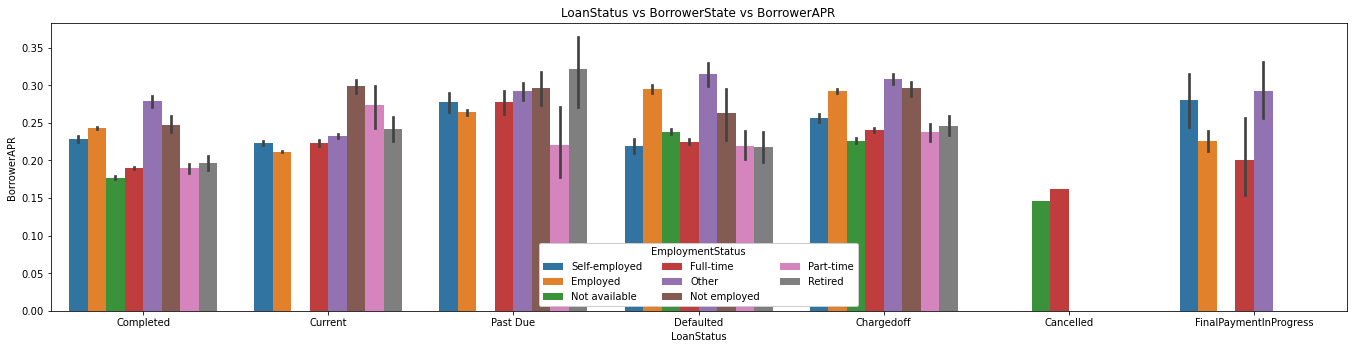

In [14]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = df_group_pastDue, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')
plt.title('LoanStatus vs BorrowerState vs BorrowerAPR')

### LoanStatus vs BorrowerAPR
**Completed** loan status has lowest borrowerAPR. **PastDue(91-120 days)** has the highest borrowerAPR.

If we group past due together, **past due** still has the highest borrowerAPR.
Completed loan status has the largest range of borrowerAPR. Canceled loan status has the narrowest range of borrowerAPR.

Text(0.5, 1.0, 'LoanStatus vs BorrowerAPR')

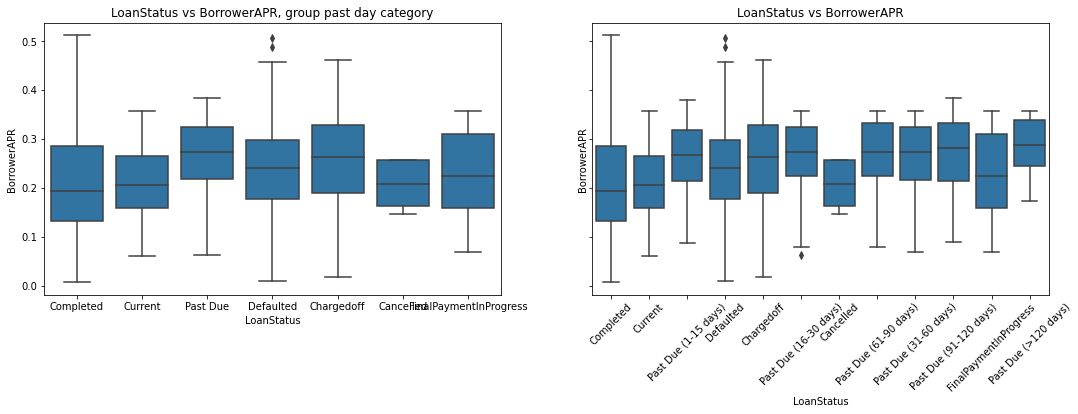

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

sb.boxplot(ax=axes[0],data=df_group_pastDue, x='LoanStatus', y='BorrowerAPR', color=base_color)
axes[0].set_title('LoanStatus vs BorrowerAPR, group past day category')
plt.xticks(rotation=45);

sb.boxplot(ax=axes[1],data=df, x='LoanStatus', y='BorrowerAPR', color=base_color)
axes[1].set_title('LoanStatus vs BorrowerAPR')

###  BorrowerAPR vs BorrowerState
The higher Borrower APR are from AR and AL and MS.
The lower Borrower APR are from ME and IA.

Text(0.5, 1.0, 'BorrowerAPR vs BorrowerState')

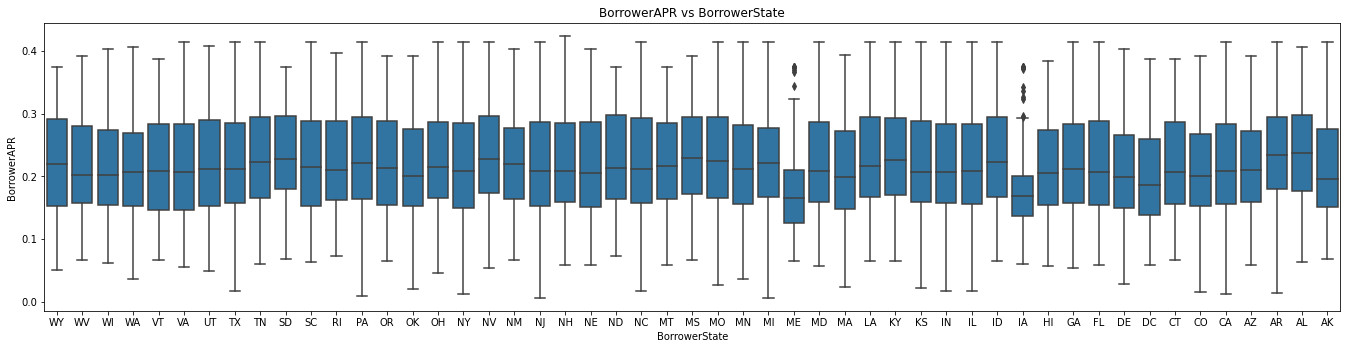

In [12]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])
my_order = df.groupby(by=["BorrowerState"])["BorrowerAPR"].mean().iloc[::-1].index

sb.boxplot(data=df, y='BorrowerAPR', x='BorrowerState', color=base_color,order=my_order)
plt.title('BorrowerAPR vs BorrowerState')

Among smaller BorrowerAPR  and larger BorrowerAPR, the highest and lowest states are different.

Among the larger Borrower APR, the highest is LA, lowest is ME.
Among the smaller Borrower APR, the highest is SD, lowest is VT.

Text(0.5, 1.0, 'Larger BorrowerAPR vs BorrowerState')

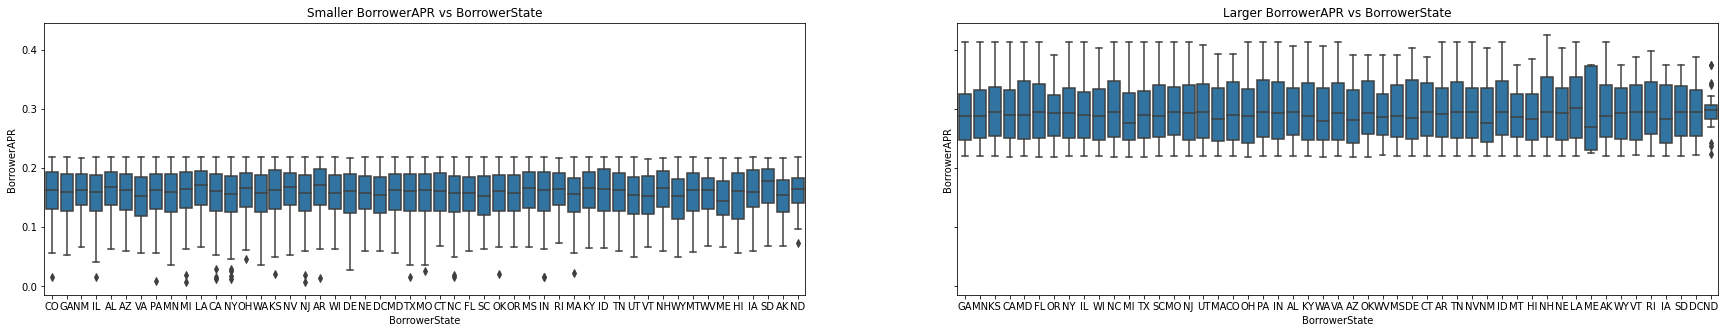

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(30, 5), sharey=True)
sb.boxplot(ax=axes[0],data=df_APR_small, y='BorrowerAPR', x='BorrowerState', color=base_color)
axes[0].set_title('Smaller BorrowerAPR vs BorrowerState')

sb.boxplot(ax=axes[1],data=df_APR_big, y='BorrowerAPR', x='BorrowerState', color=base_color)
axes[1].set_title('Larger BorrowerAPR vs BorrowerState')

### BorrowerAPR vs EmploymentStatus
The higher Borrower APR are from **not employed**.
The lower Borrower APR are from **part-time**.

Text(0.5, 1.0, 'BorrowerAPR vs EmploymentStatus')

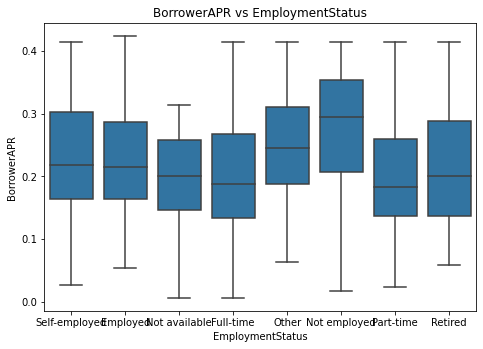

In [7]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 1, 1])
sb.boxplot(data=df, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
plt.title('BorrowerAPR vs EmploymentStatus')

Among the larger Borrower APR, the highest is not employed, lowest is unknown(not available).
Among the smaller Borrower APR, the highest is other status, lowest is full-time.

Text(0.5, 1.0, 'Larger BorrowerAPR vs EmploymentStatus')

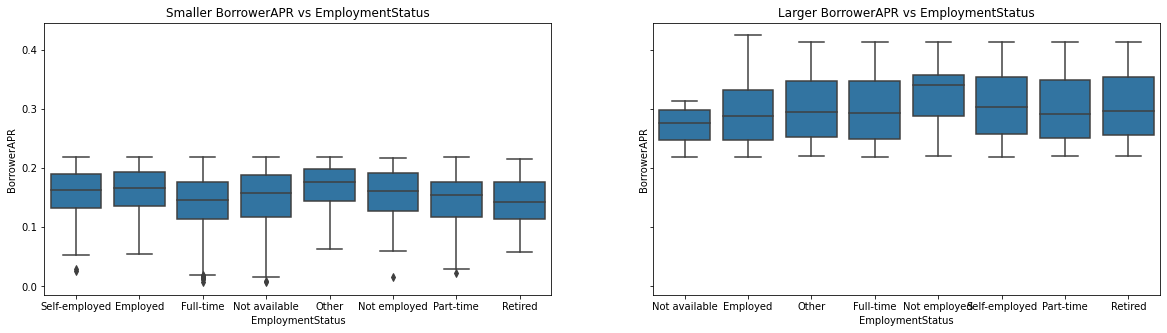

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

sb.boxplot(ax=axes[0],data=df_APR_small, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[0].set_title('Smaller BorrowerAPR vs EmploymentStatus')

sb.boxplot(ax=axes[1],data=df_APR_big, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[1].set_title('Larger BorrowerAPR vs EmploymentStatus')

### LoanStatus vs BorrowerState vs BorrowerAPR

We choose States that have standout behaviour to analysis.

The higher Borrower APR are from AR and AL.
AR has a higher borrower in defaulted load status.
AR and AL have a higher borrower AR in past due load status.

The lower Borrower APR are from ME and IA.
ME and IA in all load status are having a load borrower APR.

Amoung the smaller Borrower APR, the highest is SD. And SD have a high borrower APR in defaulted and past due load status.

Text(0.5, 1.0, 'LoanStatus vs BorrowerState vs BorrowerAPR')

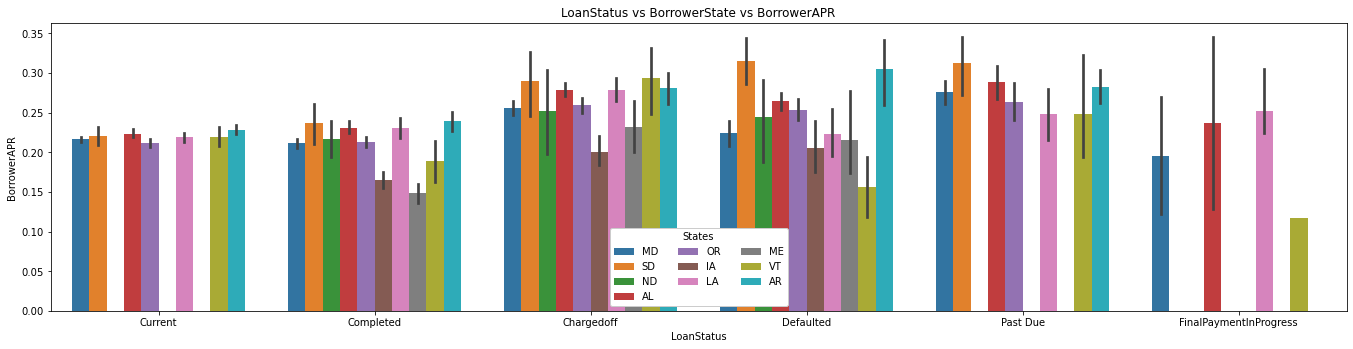

In [105]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = result, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'BorrowerState')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'States')
plt.title('LoanStatus vs BorrowerState vs BorrowerAPR')